# Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', 500)

plt.style.use('ggplot')

### Trends

In [2]:
# globale und regionale Trends der U5MR - mit dem großen raw_merged dataset
raw_merged_df = pd.read_csv("../00_data/1_interim/raw_merged_data.csv")
raw_merged_df["child_mortality_igme"] = raw_merged_df["child_mortality_igme"] * 10

world_regions = pd.read_csv("../00_data/1_interim/world-regions-worldbank.csv")
world_regions = world_regions.rename(columns={"Entity": "entity", "Year": "year"})

#### Child Mortality Trend Global

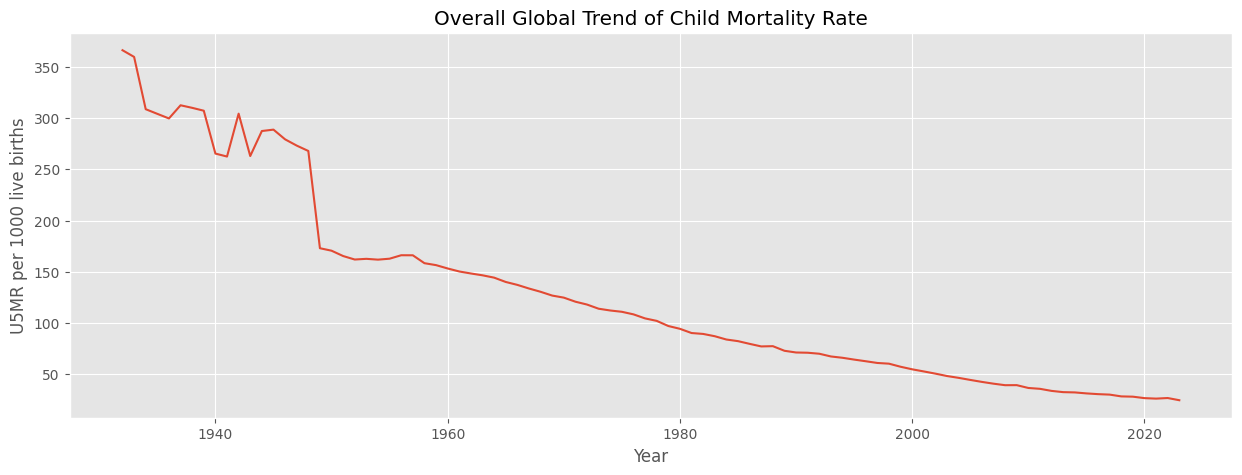

In [3]:
plt.figure(figsize=(15,5))
sns.lineplot(data=raw_merged_df, x="Year", y="child_mortality_igme", errorbar=None)
plt.ylabel("U5MR per 1000 live births")
plt.title("Overall Global Trend of Child Mortality Rate")
plt.show()

#### Child Mortality Rate per World Regions

In [4]:
world_regions = world_regions.drop(["entity", "year"], axis=1)
df_wr = pd.merge(raw_merged_df, world_regions, on="Code", how="left")

In [5]:
numeric_cols = df_wr.select_dtypes(include=["float64"]).columns.tolist()
regions_groups = df_wr.groupby(["World regions according to WB", "Year"])["child_mortality_igme"].median()
regions_groups = regions_groups.reset_index()

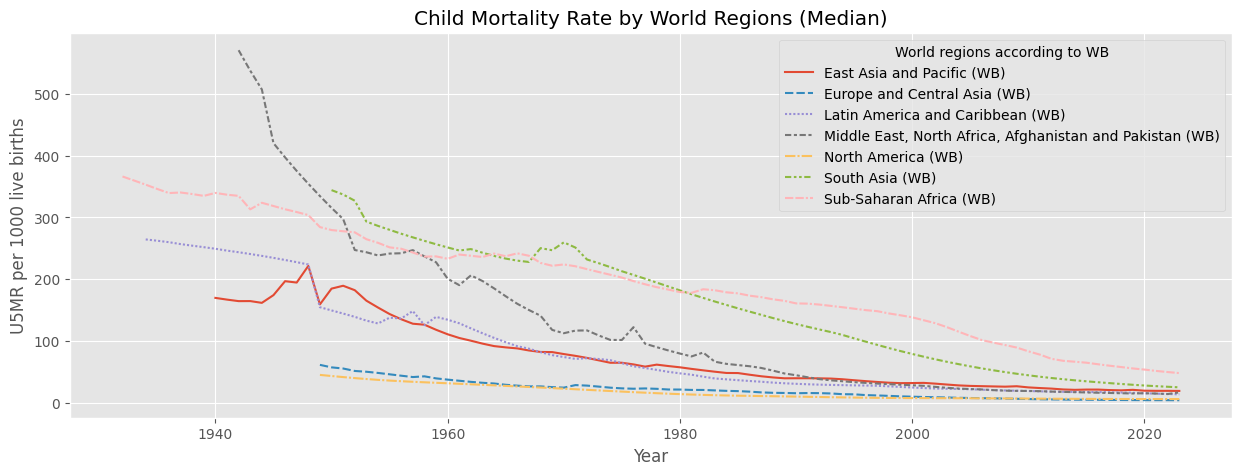

In [6]:
plt.figure(figsize=(15,5))
sns.lineplot(data=regions_groups, x="Year", y="child_mortality_igme", hue="World regions according to WB", style="World regions according to WB")
plt.ylabel("U5MR per 1000 live births")
plt.title("Child Mortality Rate by World Regions (Median)")
plt.show()

### Dataset Infos

#### Data First Insights (limited 6-year dataframe 2013-2018)

In [7]:
merged_df = pd.read_csv("../00_data/1_interim/merged_data.csv", index_col=["Code", "Year"])
filtered_df_01 = pd.read_csv("../00_data/1_interim/filtered_data_01.csv", index_col=["Code", "Year"])

In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1200 entries, ('AFG', 2013) to ('ZWE', 2018)
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    1200 non-null   object 
 1   child_mortality_igme                      1200 non-null   float64
 2   annual_healthcare_expenditure_per_capita  1142 non-null   float64
 3   gdp_per_capita_worldbank                  1128 non-null   float64
 4   nurses_and_midwives_per_1000_people       862 non-null    float64
 5   physicians_per_1000_people                753 non-null    float64
 6   prevalence_of_undernourishment            1002 non-null   float64
 7   share_of_population_urban                 1170 non-null   float64
 8   share_without_improved_water              1174 non-null   float64
 9   vaccination_coverage_who_unicef           1164 non-null   float64
 10  years_of_school

In [9]:
merged_df.describe()
# highest U5MR in whole df: 278 deaths per 1000 live births, lowest is 1,7 deaths per 1000 births
# in 25% of the data, U5MR is above 46 per 1000 births
# for half of the data, U5MR is above 17,5 per 1000 birth

,child_mortality_igme,annual_healthcare_expenditure_per_capita,gdp_per_capita_worldbank,nurses_and_midwives_per_1000_people,physicians_per_1000_people,prevalence_of_undernourishment,share_of_population_urban,share_without_improved_water,vaccination_coverage_who_unicef,years_of_schooling
count,1200.000000,1142.000000,1128.000000,862.000000,753.000000,1002.000000,1170.000000,1174.000000,1164.000000,1132.000000
mean,30.641786,1384.140573,22588.782826,4.730940,2.151936,9.836627,58.278545,8.766518,88.289519,8.339549
std,33.522547,1715.310940,23416.547441,4.094242,1.666007,10.225440,23.035379,11.775164,13.337069,3.547940
min,1.749197,25.303010,868.555500,0.101300,0.013000,2.500000,11.482000,0.000000,19.000000,0.672197
25%,7.655497,207.347112,5344.745225,1.349250,0.603000,2.500000,40.047000,0.494207,84.750000,5.268316
50%,17.566985,685.098850,14441.918000,3.913000,2.148000,5.850000,58.026500,3.018631,93.000000,9.004750
75%,46.153776,1805.880075,31796.610500,6.734750,3.299000,13.400000,77.251750,13.830902,97.000000,11.170749
max,278.187220,10182.256000,136454.000000,20.830000,8.568000,62.600000,100.000000,57.326244,99.000000,14.140000


#### Child Mortality Rate Grouped by Mean Rate Value

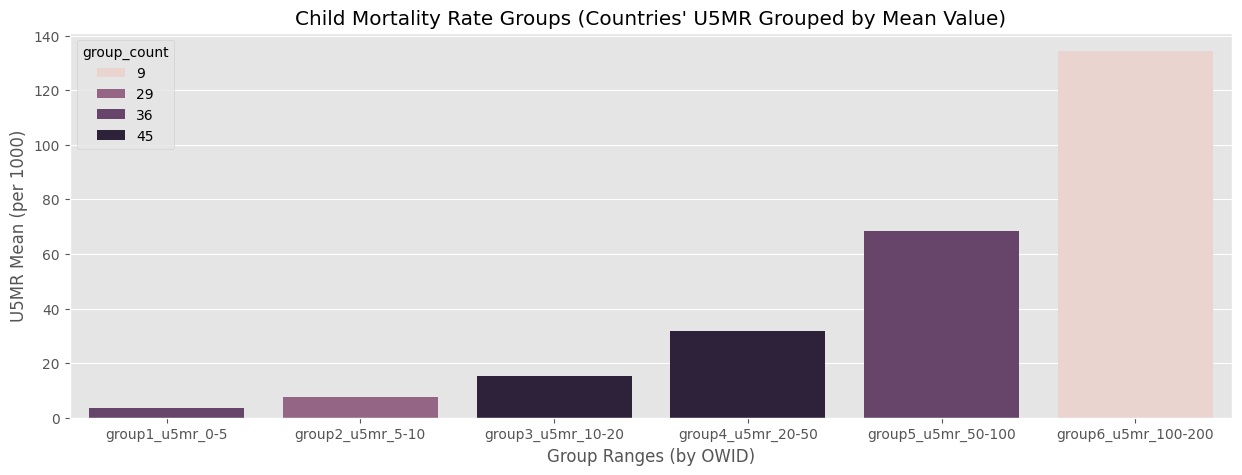

In [10]:
# minimum: 1.74, maximum: 278
# create classified mean groups based on: https://ourworldindata.org/grapher/child-mortality-igme
# (rate per 1000) - 0-5, 5-10, 10-20, 20-50, 50-100, 100-200
#rates_thresholds = [5, 10, 20, 50, 100, 200]
rates_thresholds = {"group1_u5mr_0-5": (0,5), "group2_u5mr_5-10": (5,10), "group3_u5mr_10-20": (10,20), 
                    "group4_u5mr_20-50": (20,50), "group5_u5mr_50-100": (50,100), "group6_u5mr_100-200": (100,200)}

u5mr_rates_df = merged_df.copy()
u5mr_rates_df = u5mr_rates_df.reset_index()
u5mr_groups = u5mr_rates_df.groupby("Entity")["child_mortality_igme"].agg(["mean"])
u5mr_groups = u5mr_groups.reset_index()

def get_group(rate):
    for group, (range1, range2) in rates_thresholds.items():
        if range1 <= rate < range2:
            return group
    return ""

u5mr_groups["group"] = u5mr_groups["mean"].apply(get_group)
u5mr_groups["group_count"] = u5mr_groups.groupby("group")["group"].transform("count")

plt.figure(figsize=(15,5))
sns.barplot(data=u5mr_groups.sort_values(by="mean"), x="group", y="mean", hue="group_count", errorbar=None)
plt.title("Child Mortality Rate Groups (Countries' U5MR Grouped by Mean Value)")
plt.xlabel("Group Ranges (by OWID)")
plt.ylabel("U5MR Mean (per 1000)")
plt.show()

#### Histograms

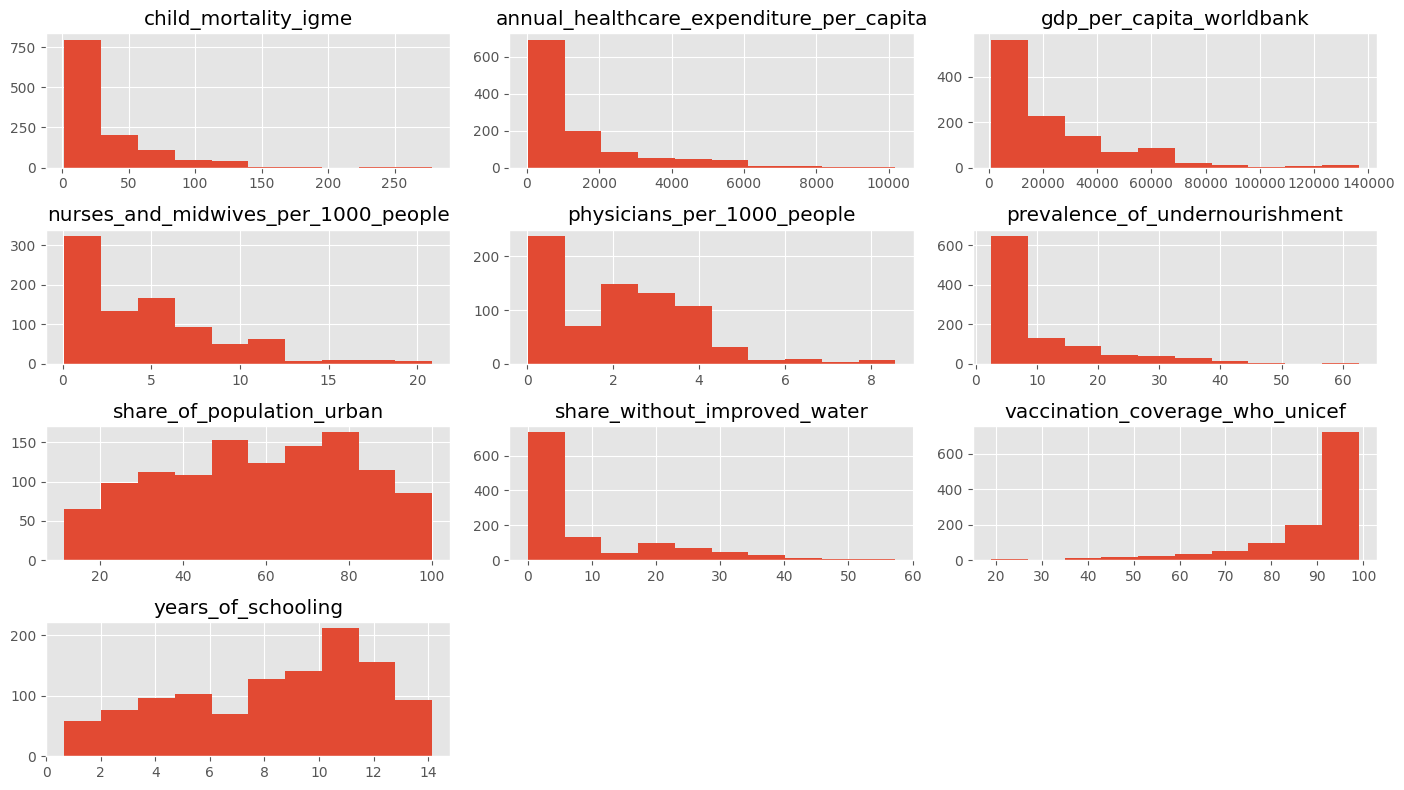

In [11]:
#Histograms of label & features
#FINDING: Label + 6 features haben rechtsschiefe Verteilung (viele Datenpunkte sammeln sich im linken Bereich an)
merged_df.hist(figsize=(14,8))
plt.tight_layout()
plt.show()

In [12]:
#Skewness of each numeric column
merged_df.skew(numeric_only=True)

child_mortality_igme                        2.152041
annual_healthcare_expenditure_per_capita    1.959528
gdp_per_capita_worldbank                    1.848820
nurses_and_midwives_per_1000_people         1.222304
physicians_per_1000_people                  0.711832
prevalence_of_undernourishment              1.954790
share_of_population_urban                  -0.115794
share_without_improved_water                1.558764
vaccination_coverage_who_unicef            -2.019852
years_of_schooling                         -0.446320
dtype: float64

#### Boxplots

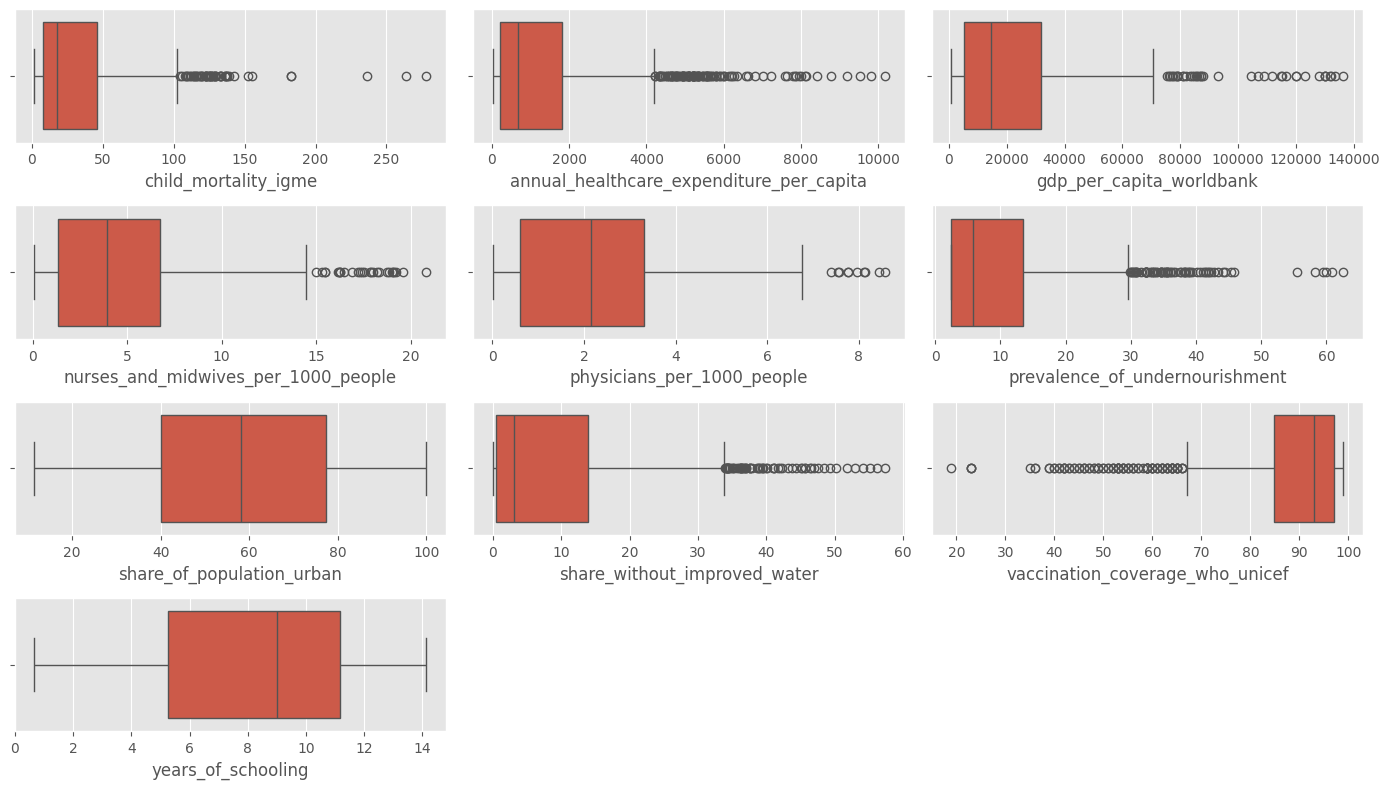

In [13]:
#sns.boxplot(x=merged_df["child_mortality_igme"])
variables = merged_df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(14,8))
for id, c in enumerate(variables):
    plt.subplot(4,3, id+1)
    sns.boxplot(x=merged_df[c])
    plt.tight_layout()
plt.show()

#NOTE:
# as the histograms show, the boxplots also visualize the skewness of the many columns
# share_urban & years_schooling are only ones that are normal distributed & no outliers
# since there are high disparity between countries globally, its not surprising & shows the realistic differences

### Explorative Analysis - First Insights

#### Scatterplots - Relationships between Label & Features

In [14]:
#Scatterplots - Group by Feature Aspect
def scatterplots(df, features, cols_num):
    fig, axs = plt.subplots(ncols=cols_num, figsize=(18, 6))
    for id, a in enumerate(axs):
        sns.scatterplot(data=df, x="child_mortality_igme", y=features[id], hue=features[id], 
                        size=features[id], sizes=(25, 100), ax=axs[id])
    plt.show()

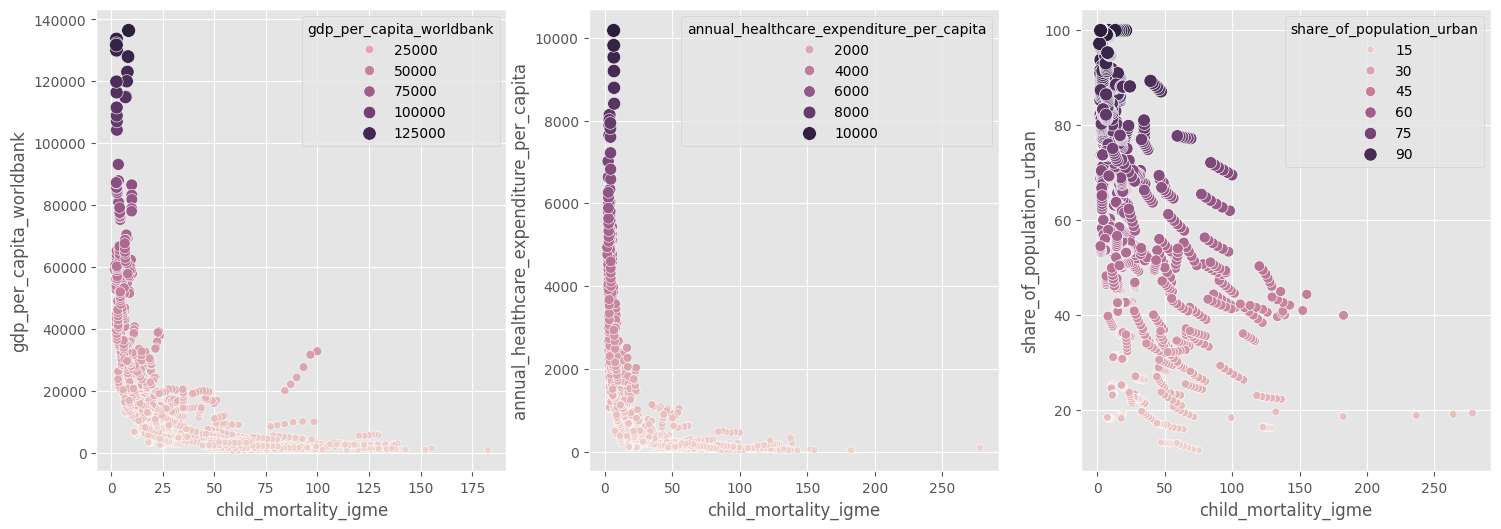

In [15]:
# relationship between label and features (economic/financial, dempgrafic related)
socio_econ = ["gdp_per_capita_worldbank", "annual_healthcare_expenditure_per_capita", "share_of_population_urban"]
scatterplots(merged_df, socio_econ, 3)

#NOTES:
# similar scatter for gdp-u5mr und for annual_healthcare-u5mr (logarithmusähnliche Kurve, negative correlation)
# share_population_urban-u5mr negative correlation 
# many countries near 0 for u5mr

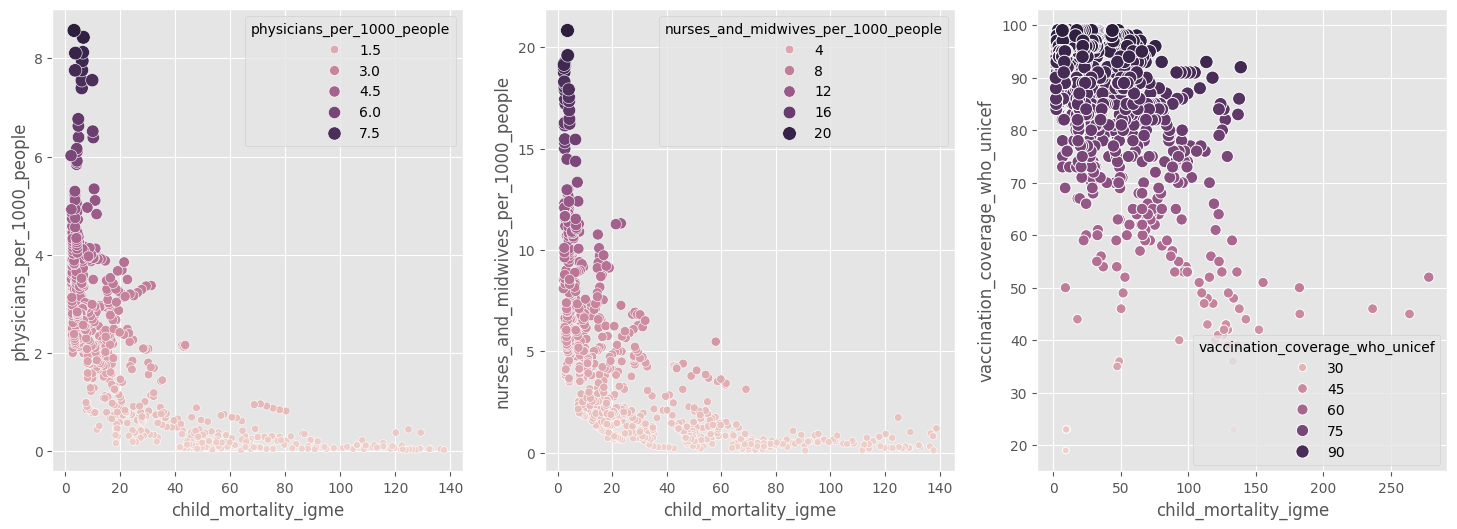

In [16]:
# relationship between label and features (health/medical related)
health_medical = ["physicians_per_1000_people", "nurses_and_midwives_per_1000_people", "vaccination_coverage_who_unicef"]
scatterplots(merged_df, health_medical, 3)

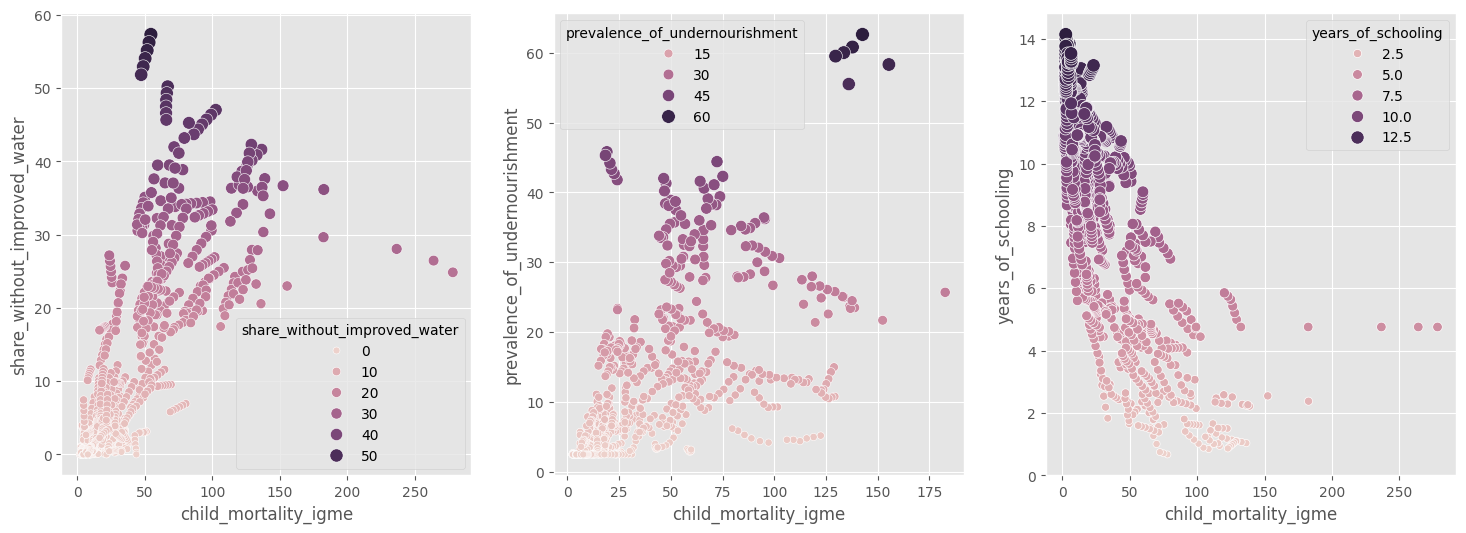

In [17]:
# relationship between label and features (living/development, hygiene related)
living_development = ["share_without_improved_water", "prevalence_of_undernourishment", "years_of_schooling"]
scatterplots(merged_df, living_development, 3)

#### Correlations

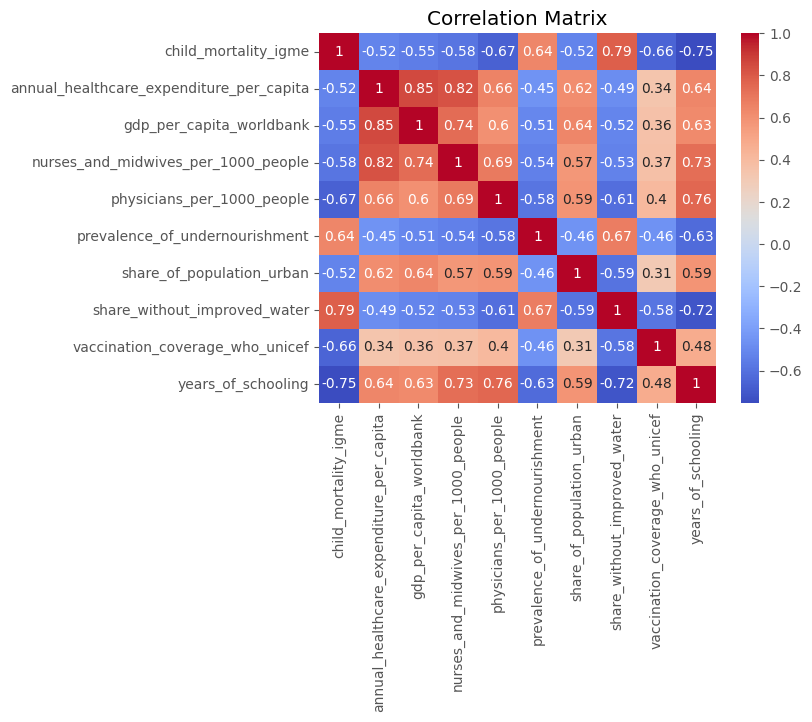

In [18]:
#show correlations between features and label
# starke Korrelationen Label-Feature: share_without_improved_water, years_of_schooling
# mäßig-starke Korrelationen Label-Feature: physicians_per_1000, undernourishment, vaccination_coverage, nurses_midwives_per_1000
# mäßige Korrelationen Label-Feature: annual_healthcare_exp, gdp_per_capita, share_of_pop_urban

# starke Korrelationen Feature-Feature: gdp & annual_healthcare_exp (0.85), nurses_midwives & annual_healthcare_exp (0.82)
# mäßig-starke Korr. Feature-Feature: physicians_per_1000 & years_schooling (0.76), nurses_midwives & gdp_per_capita (0.74),
                                      #nurses_midwives & years_schooling (0.73)
features_corr = merged_df.copy()
features_corr = features_corr.drop(columns=["Entity"])
corr = features_corr.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#### Variables <> Label patterns

In [45]:
df_vars_lbl = filtered_df_01.copy()
df_vars_lbl = df_vars_lbl.reset_index()
df_vars_lbl = pd.merge(df_vars_lbl, world_regions, on="Code", how="left")
medians_df = df_vars_lbl.groupby(["World regions according to WB", "Year"])[numeric_cols].median()
medians_df = medians_df.reset_index()

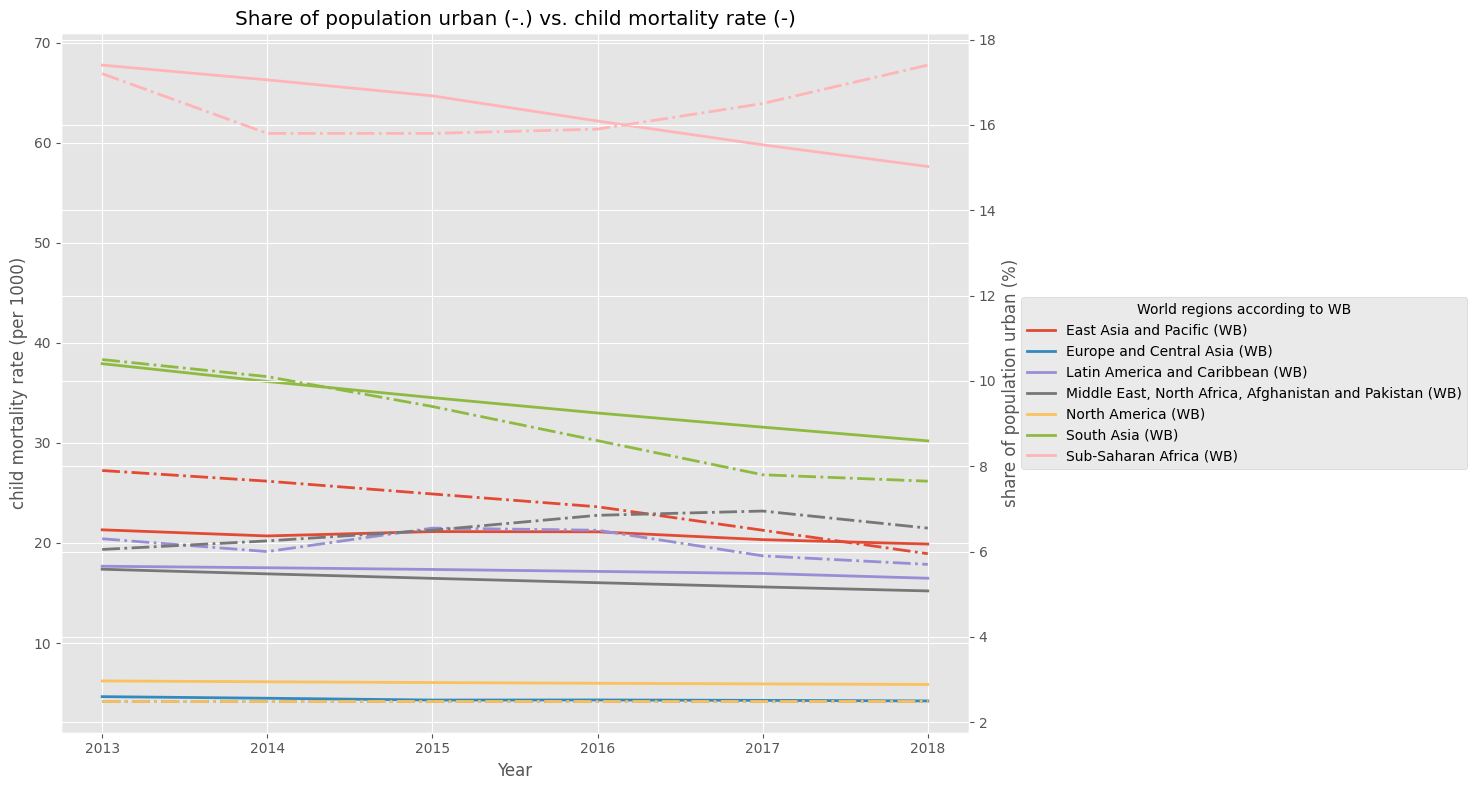

In [99]:
fig, ax1 = plt.subplots(figsize=(15, 8))
sns.lineplot(x='Year', y='child_mortality_igme', data=medians_df, ax=ax1, hue='World regions according to WB', linewidth=2)
ax2 = ax1.twinx()
sns.lineplot(x='Year', y='prevalence_of_undernourishment', data=medians_df, ax=ax2, hue='World regions according to WB', linestyle="-.", linewidth=2, legend=False)
sns.move_legend(
    ax1, 
    "center left", 
    bbox_to_anchor=(1.05, 0.5)
)
plt.title("Share of population urban (-.) vs. child mortality rate (-)")
ax1.set(ylabel='child mortality rate (per 1000)')
ax2.set(ylabel='share of population urban (%)')
plt.tight_layout()
plt.show()

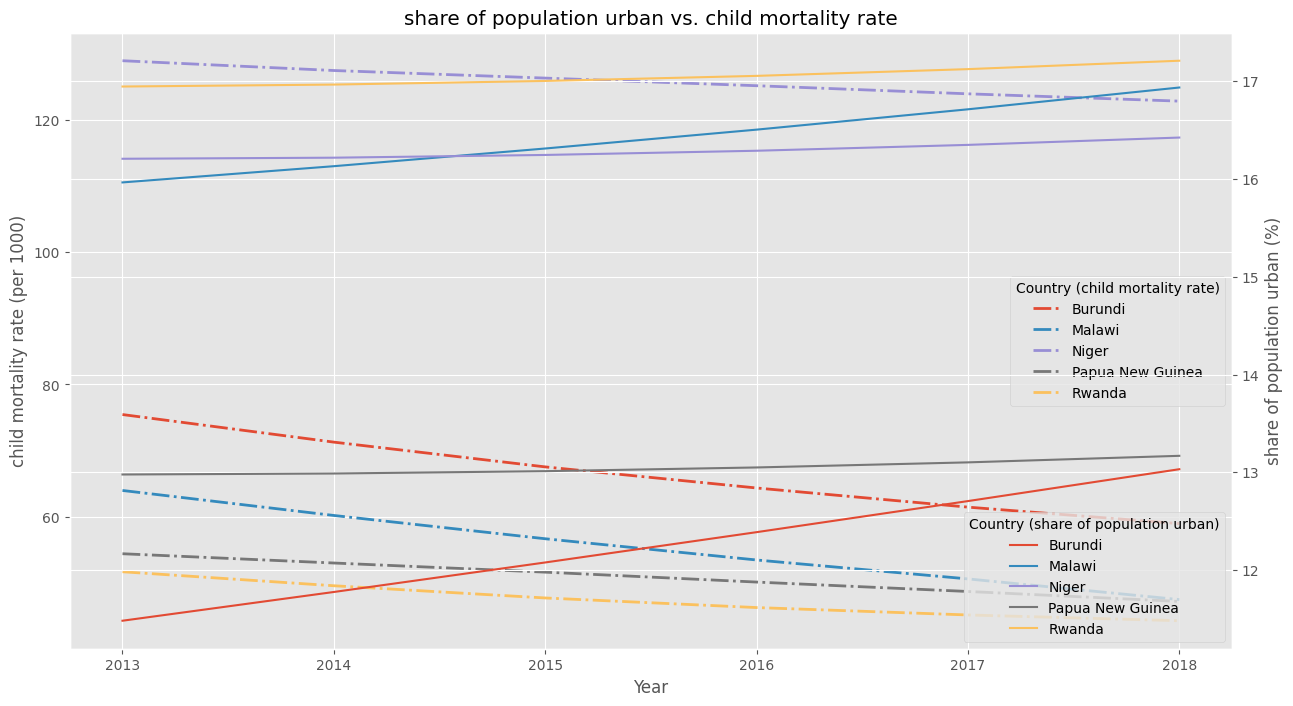

In [36]:
patterns_df = filtered_df_01.copy()
patterns_df = patterns_df.reset_index()
patterns_df_vars = patterns_df.drop(columns=["child_mortality_igme"])
patterns_df_label = patterns_df[["child_mortality_igme"]]


urban_patterns = patterns_df.groupby("Entity")["share_of_population_urban"].sum()
highest_urban = urban_patterns.nlargest(5).index.tolist()
lowest_urban = urban_patterns.nsmallest(5).index.tolist()

top_5 = patterns_df[patterns_df["Entity"].isin(highest_urban)]
btm_5 = patterns_df[patterns_df["Entity"].isin(lowest_urban)]
#print(lowest_gdp, highest_gdp)

fig, ax1 = plt.subplots(figsize=(15, 8))

sns.lineplot(x='Year', y='child_mortality_igme', data=btm_5, ax=ax1, hue='Entity', linestyle="-.", linewidth=2)
ax2 = ax1.twinx()
sns.lineplot(x='Year', y='share_of_population_urban', data=btm_5, ax=ax2, hue='Entity')
ax1.legend(title="Country (child mortality rate)") 
ax2.legend(title="Country (share of population urban)") 
plt.title("share of population urban vs. child mortality rate")
ax1.set(ylabel='child mortality rate (per 1000)')
ax2.set(ylabel='share of population urban (%)')
plt.show()

### Check Missing Values

In [38]:
# Null values count
def count_missing_values(df):
    print(f"DataFrame has {df.isna().sum().sum()} null values in total.\n")
    null_count = df.isna().sum()
    null_count_perc = round((null_count / len(df)) * 100, 2)
    print(f"Missing Values - count for each column:\n\n{null_count}\n\nPercentage of Missing values:\n\n{null_count_perc}")

count_missing_values(merged_df)

DataFrame has 1273 null values in total.

Missing Values - count for each column:

Entity                                        0
child_mortality_igme                          0
annual_healthcare_expenditure_per_capita     58
gdp_per_capita_worldbank                     72
nurses_and_midwives_per_1000_people         338
physicians_per_1000_people                  447
prevalence_of_undernourishment              198
share_of_population_urban                    30
share_without_improved_water                 26
vaccination_coverage_who_unicef              36
years_of_schooling                           68
dtype: int64

Percentage of Missing values:

Entity                                       0.00
child_mortality_igme                         0.00
annual_healthcare_expenditure_per_capita     4.83
gdp_per_capita_worldbank                     6.00
nurses_and_midwives_per_1000_people         28.17
physicians_per_1000_people                  37.25
prevalence_of_undernourishment              

#### Missing Values by Code (Country ID)

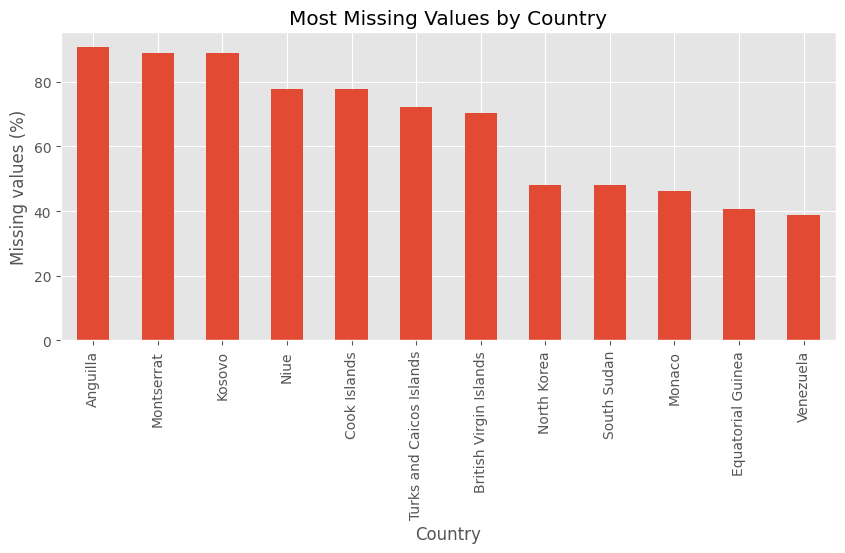

Top 12 Countries with most missing values:
Entity
Anguilla                    90.74
Montserrat                  88.89
Kosovo                      88.89
Niue                        77.78
Cook Islands                77.78
Turks and Caicos Islands    72.22
British Virgin Islands      70.37
North Korea                 48.15
South Sudan                 48.15
Monaco                      46.30
Equatorial Guinea           40.74
Venezuela                   38.89
Name: total_missing_%, dtype: float64


In [39]:
# Missing Values by Country ID (Code)
rows_per_country = merged_df.groupby(level=0).size().iloc[0]

all_missing_values = merged_df.isnull().groupby(merged_df["Entity"]).sum()
all_missing_values["total_missing"] = all_missing_values.sum(axis=1)
all_missing_values["total_missing_%"] = round( ( all_missing_values["total_missing"] / (9 * rows_per_country) ) * 100, 2)

#plot top 12 countries with most missing values
top_missing_countries = all_missing_values.sort_values(ascending=False, by="total_missing")
top_12_missing = top_missing_countries["total_missing_%"].head(12)
top_12_missing.plot(kind="bar", figsize=(10,4))

plt.xlabel("Country")
plt.ylabel("Missing values (%)")
plt.title("Most Missing Values by Country")
plt.show()
print(f"Top 12 Countries with most missing values:\n{top_12_missing}")

In [40]:
#Missing values after first filtered df (7 countries excluded)
count_missing_values(filtered_df_01)
filtered_df_01 = filtered_df_01.reset_index()

DataFrame has 967 null values in total.

Missing Values - count for each column:

Entity                                        0
child_mortality_igme                          0
annual_healthcare_expenditure_per_capita     16
gdp_per_capita_worldbank                     42
nurses_and_midwives_per_1000_people         300
physicians_per_1000_people                  405
prevalence_of_undernourishment              156
share_of_population_urban                     0
share_without_improved_water                 16
vaccination_coverage_who_unicef               6
years_of_schooling                           26
dtype: int64

Percentage of Missing values:

Entity                                       0.00
child_mortality_igme                         0.00
annual_healthcare_expenditure_per_capita     1.38
gdp_per_capita_worldbank                     3.63
nurses_and_midwives_per_1000_people         25.91
physicians_per_1000_people                  34.97
prevalence_of_undernourishment              1

#### Missing Values Heatmap

In [21]:
#Missing values after first filtered df (7 countries excluded)
count_missing_values(filtered_df_01)
filtered_df_01 = filtered_df_01.reset_index()

DataFrame has 967 null values in total.

Missing Values - count for each column:

Entity                                        0
child_mortality_igme                          0
annual_healthcare_expenditure_per_capita     16
gdp_per_capita_worldbank                     42
nurses_and_midwives_per_1000_people         300
physicians_per_1000_people                  405
prevalence_of_undernourishment              156
share_of_population_urban                     0
share_without_improved_water                 16
vaccination_coverage_who_unicef               6
years_of_schooling                           26
dtype: int64

Percentage of Missing values:

Entity                                       0.00
child_mortality_igme                         0.00
annual_healthcare_expenditure_per_capita     1.38
gdp_per_capita_worldbank                     3.63
nurses_and_midwives_per_1000_people         25.91
physicians_per_1000_people                  34.97
prevalence_of_undernourishment              1

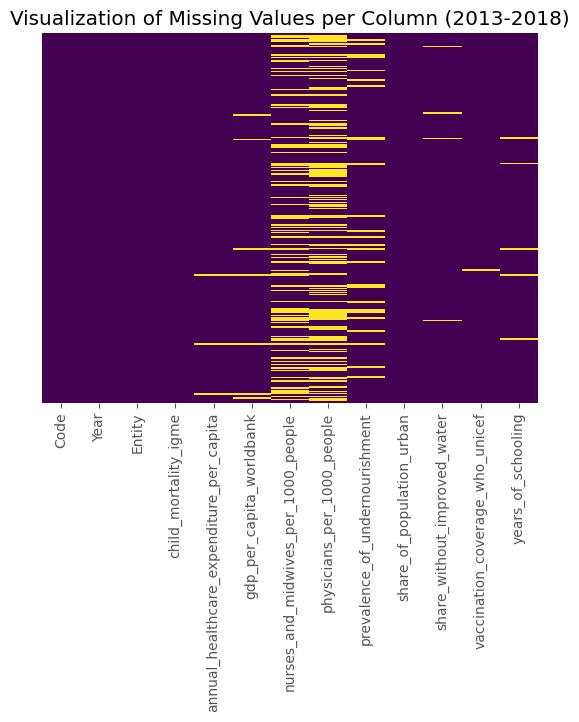

In [22]:
# Show missingness matrix for df after 7 countries deleted
sns.heatmap(filtered_df_01.isna(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Visualization of Missing Values per Column (2013-2018)")
plt.show()

#### Misingness Indicators Correlations

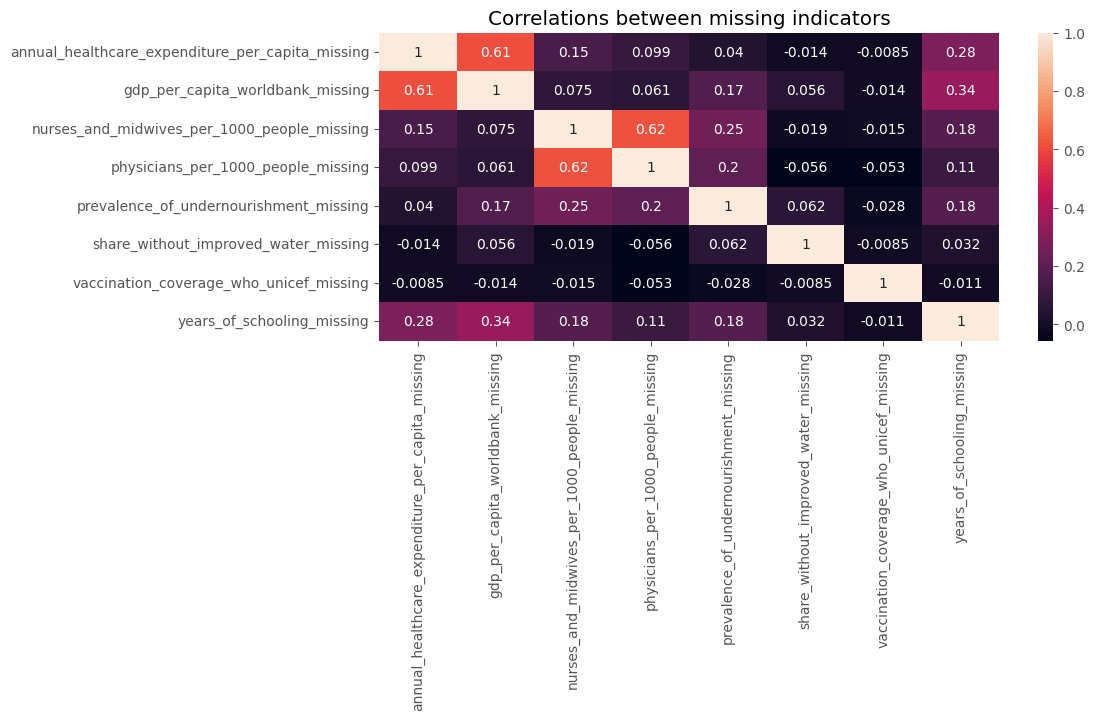

In [23]:
# generate missingness indicators (binary: 0=not missing, 1=missing) & plot correlations
missing_cols_df = filtered_df_01.copy()
for c in numeric_cols:
    if missing_cols_df[c].isna().sum() > 0:
        missing_cols_df[f"{c}_missing"] = missing_cols_df[c].isna().astype(int)

missing_columns = missing_cols_df.columns[missing_cols_df.columns.str.contains("missing")].tolist()
# correlations between missing indicator cols
missings_corr = missing_cols_df[missing_columns].corr()
#missings_corr = missing_cols_df[["nurses_and_midwives_per_1000_people_missing", "physicians_per_1000_people_missing",
#                                 "annual_healthcare_expenditure_per_capita_missing", "share_without_improved_water_missing",
#                                 "prevalence_of_undernourishment_missing", "gdp_per_capita_worldbank_missing", 
#                                 "years_of_schooling_missing"]].corr()
plt.figure(figsize=(10,4))
sns.heatmap(missings_corr, annot=True)
plt.title("Correlations between missing indicators")
plt.show()

### Missing Values per Column per Country

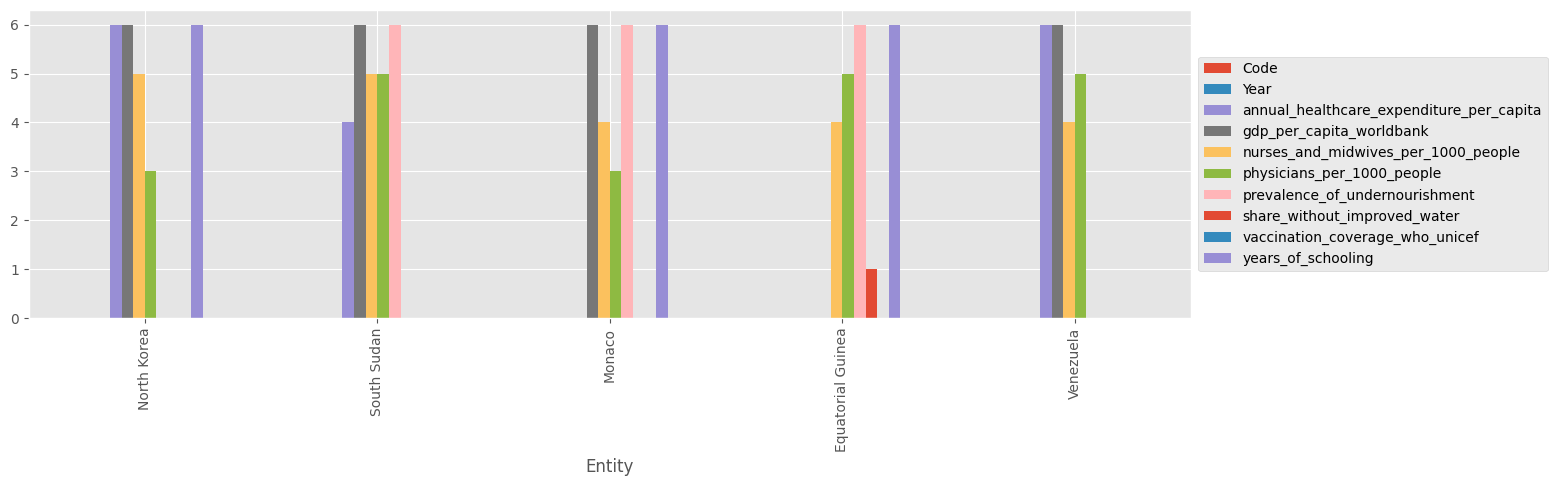

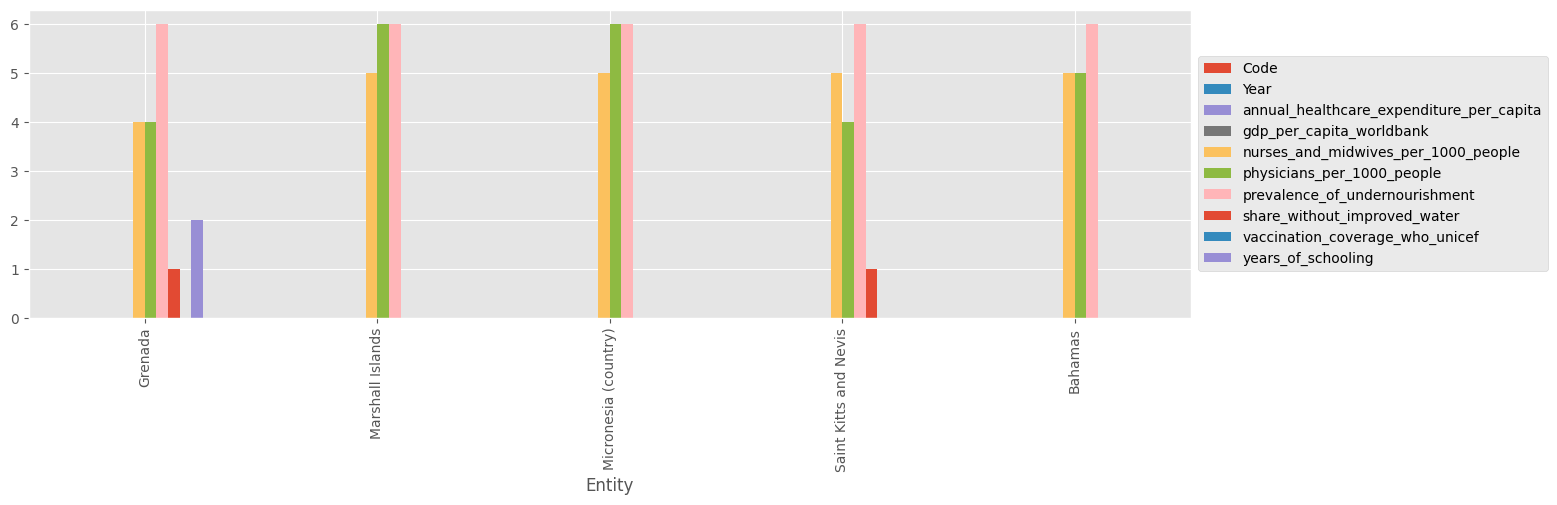

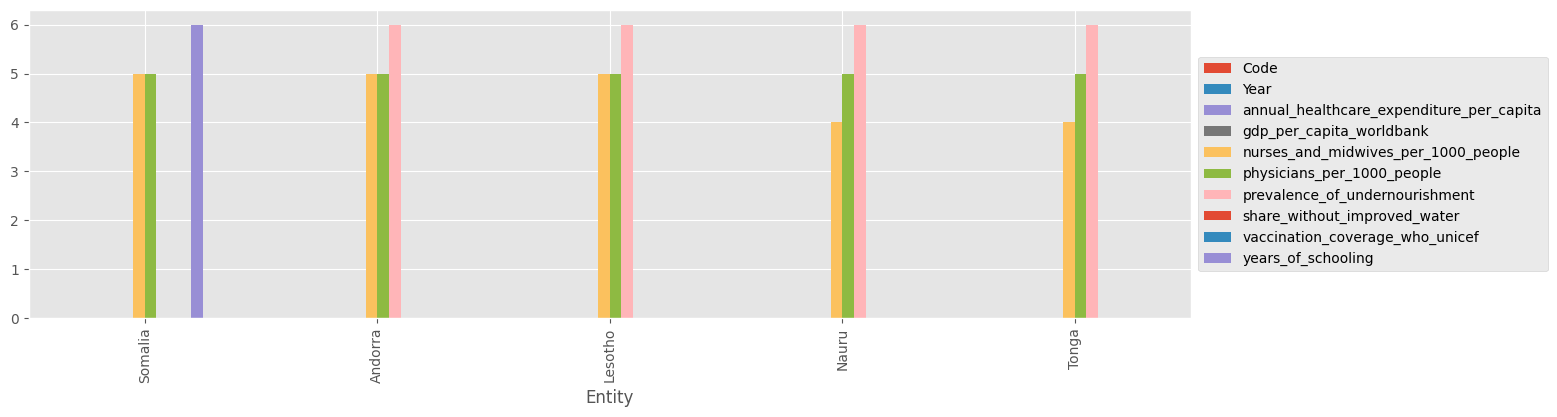

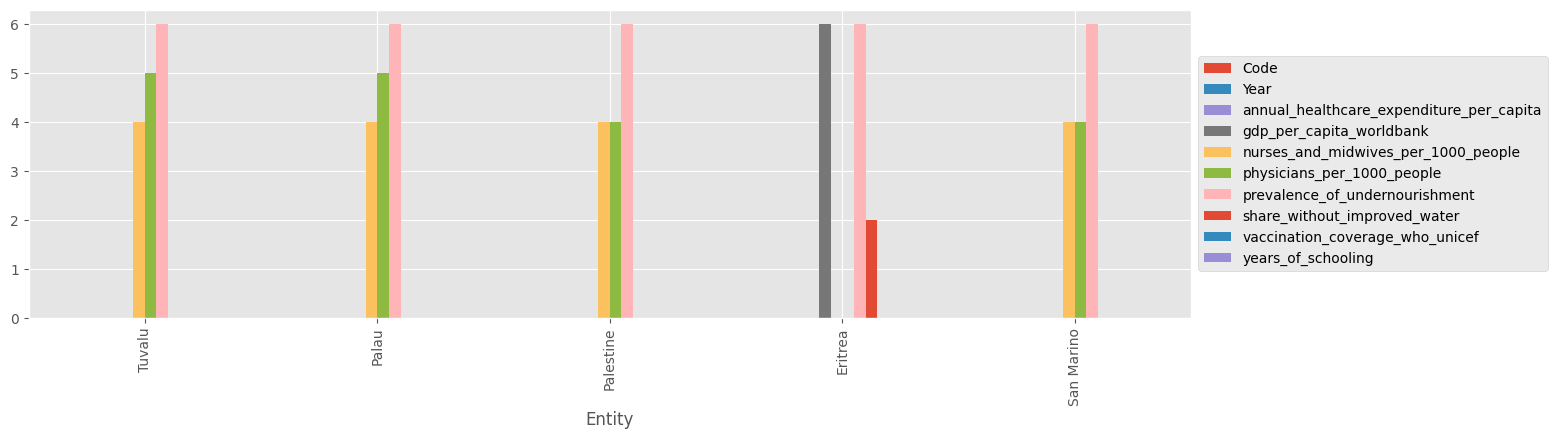

In [24]:
# get top countries with most missing values per numeric column
def missing_values_countries(row_from, row_to):
    nans_per_col_country = filtered_df_01.groupby("Entity").apply(lambda x: x.isna().sum(), include_groups=False)
    nans_per_col_country["total_missing"] = nans_per_col_country.sum(axis=1)
    most_nulls = nans_per_col_country.sort_values(by="total_missing", ascending=False)

    most_nulls.iloc[row_from:row_to].drop(columns=["child_mortality_igme", "share_of_population_urban", "total_missing"]).plot(kind="bar", figsize=(15, 4))
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

missing_values_countries(0,5)
missing_values_countries(5,10)
missing_values_countries(10,15)
missing_values_countries(15,20)

### Understanding Missing Values 

#### MAR Test #1

In [44]:
#### Vermutung 2 - Daten sind MAR (Missing at Random)
# für jede Spalte mit  NaNs untersuchen, ob das Fehlen von anderen Variablen abhängt
# TEST 1: Missingness based on World Regions by WorldBank dataset - by mean()
mar_test1 = filtered_df_01.copy()
mar_test1 = mar_test1.reset_index(drop=True)
mar_test_df = pd.merge(mar_test1, world_regions, on="Code", how="left")

def missing_rate_by_country():
    for col in mar_test_df.columns:
        if mar_test_df[col].isna().sum() > 0:
            mar_test_df[col+"_missing"] = mar_test_df[col].isna().astype(int)
            missing_by_country = mar_test_df.groupby('World regions according to WB')[col+"_missing"].mean()
            print(f"\nMissing Value Rates by Country for {col}:")
            print(missing_by_country.sort_values(ascending=False))

# missing rate varies between regions
missing_rate_by_country()


Missing Value Rates by Country for annual_healthcare_expenditure_per_capita:
World regions according to WB
East Asia and Pacific (WB)                                  0.033333
Latin America and Caribbean (WB)                            0.030303
Sub-Saharan Africa (WB)                                     0.013889
Europe and Central Asia (WB)                                0.000000
Middle East, North Africa, Afghanistan and Pakistan (WB)    0.000000
North America (WB)                                          0.000000
South Asia (WB)                                             0.000000
Name: annual_healthcare_expenditure_per_capita_missing, dtype: float64

Missing Value Rates by Country for gdp_per_capita_worldbank:
World regions according to WB
Latin America and Caribbean (WB)                            0.060606
Middle East, North Africa, Afghanistan and Pakistan (WB)    0.043478
Sub-Saharan Africa (WB)                                     0.041667
East Asia and Pacific (WB)             

In [45]:
# Test between numeric columns
#moderate negative correlation (the higher the gdp, the less likely physicians column is missing)
mar_test_df[['physicians_per_1000_people_missing', 'gdp_per_capita_worldbank']].corr()

,physicians_per_1000_people_missing,gdp_per_capita_worldbank
physicians_per_1000_people_missing,1.000000,-0.256974
gdp_per_capita_worldbank,-0.256974,1.000000


In [48]:
# check for all columns that have missing values the correlation to other numeric columns
missing_indicator_cols = [column for column in mar_test_df.columns if "missing" in column]
numeric_cols = mar_test_df.select_dtypes(include=['float64'])
correlations = []

def missingess_corr():
    for missing_col in missing_indicator_cols:
        for numeric_var in numeric_cols:
            missing_vs_variable = mar_test_df[[numeric_var, missing_col]].corr()
            correlations.append(missing_vs_variable.to_string())
            
    for c in correlations:
        print(f"\n{c}\n")

#missingess_corr()

#### Check for MAR (Missing at Random) - Median Comparison between missing & non-missing group

In [49]:
# based on Misingness Indicators Correlations: check missingness in detail with other variables' relationship
# 1) physicians_per_1000_people_missing & nurses_and_midwives_per_1000_people_missing (0.62)
# 2) gdp_per_capita_missing & annual_healthcare_expenditure_per_capita_missing (0.61)
# 3) gdp_per_capita_missing & years_of_schooling_missing (0.34)

def median_comparison_missingness(df, missing_var):
    comparison_results = []
    numeric_variables = df.select_dtypes(include=['float64']).columns.drop(["child_mortality_igme", missing_var.removesuffix("_missing")])
    for var in numeric_variables:
        median_comparisons = df.groupby(missing_var)[var].median()
        comparison_results.append(median_comparisons)
        #print(f"median comparison when not missing (0) & when missing (1): \n {median_comparisons}\n")
    return pd.DataFrame(comparison_results)

In [50]:
median_comparison_missingness(mar_test_df, "physicians_per_1000_people_missing")

physicians_per_1000_people_missing,0,1
annual_healthcare_expenditure_per_capita,1022.243000,408.741850
gdp_per_capita_worldbank,19496.805500,8825.103000
nurses_and_midwives_per_1000_people,4.354000,1.866500
prevalence_of_undernourishment,3.800000,9.300000
share_of_population_urban,63.112000,52.168000
share_without_improved_water,2.009468,6.246925
vaccination_coverage_who_unicef,94.000000,90.000000
years_of_schooling,10.030001,7.466536


In [51]:
median_comparison_missingness(mar_test_df, "nurses_and_midwives_per_1000_people_missing")

nurses_and_midwives_per_1000_people_missing,0,1
annual_healthcare_expenditure_per_capita,877.013900,336.869170
gdp_per_capita_worldbank,16948.080000,6168.420500
physicians_per_1000_people,2.158500,0.664000
prevalence_of_undernourishment,4.600000,10.500000
share_of_population_urban,61.631500,52.582000
share_without_improved_water,2.597259,7.589516
vaccination_coverage_who_unicef,94.000000,88.000000
years_of_schooling,9.562396,7.256609


In [52]:
median_comparison_missingness(mar_test_df, "gdp_per_capita_worldbank_missing")

gdp_per_capita_worldbank_missing,0,1
annual_healthcare_expenditure_per_capita,685.393275,153.930045
nurses_and_midwives_per_1000_people,3.930500,1.443500
physicians_per_1000_people,2.147000,3.671000
prevalence_of_undernourishment,5.800000,25.950000
share_of_population_urban,57.900000,61.374000
share_without_improved_water,3.040958,5.042484
vaccination_coverage_who_unicef,93.000000,94.000000
years_of_schooling,9.062000,4.760000


In [53]:
median_comparison_missingness(mar_test_df, "annual_healthcare_expenditure_per_capita_missing")

annual_healthcare_expenditure_per_capita_missing,0,1
gdp_per_capita_worldbank,14441.918000,NaN
nurses_and_midwives_per_1000_people,3.854000,2.001000
physicians_per_1000_people,2.147000,3.583500
prevalence_of_undernourishment,5.800000,32.600000
share_of_population_urban,57.866000,61.574500
share_without_improved_water,3.075127,5.042484
vaccination_coverage_who_unicef,93.000000,83.000000
years_of_schooling,9.001428,9.775000


In [54]:
median_comparison_missingness(mar_test_df, "years_of_schooling_missing")

years_of_schooling_missing,0,1
annual_healthcare_expenditure_per_capita,692.630825,478.013610
gdp_per_capita_worldbank,14465.774000,13845.615000
nurses_and_midwives_per_1000_people,3.851500,2.435500
physicians_per_1000_people,2.147000,3.680000
prevalence_of_undernourishment,5.800000,50.650000
share_of_population_urban,57.828500,61.788500
share_without_improved_water,3.084724,4.804283
vaccination_coverage_who_unicef,93.000000,93.000000


In [55]:
median_comparison_missingness(mar_test_df, "prevalence_of_undernourishment_missing")

prevalence_of_undernourishment_missing,0,1
annual_healthcare_expenditure_per_capita,669.394000,1017.638850
gdp_per_capita_worldbank,14059.777500,19962.148000
nurses_and_midwives_per_1000_people,3.831000,4.365000
physicians_per_1000_people,2.212500,1.405000
share_of_population_urban,57.828500,65.965500
share_without_improved_water,3.785019,1.358391
vaccination_coverage_who_unicef,93.000000,96.000000
years_of_schooling,9.000000,9.129844


In [36]:
#df used to check for MAR
mar_test_df.to_csv("../00_data/1_interim/mar_test_data.csv", index=False)